Mode: trend
  Prediction 1 Score: 87.29, Grade: B+.
  Prediction 2 Score: 87.18, Grade: B+.
  Prediction 3 Score: 87.32, Grade: B+.
  Prediction 4 Score: 87.47, Grade: B+.

Mode: improve
  Prediction 1 Score: 87.29, Grade: B+.
  Prediction 2 Score: 87.56, Grade: B+.
  Prediction 3 Score: 87.66, Grade: B+.
  Prediction 4 Score: 87.87, Grade: B+.

Mode: regress
  Prediction 1 Score: 87.29, Grade: B+.
  Prediction 2 Score: 87.16, Grade: B+.
  Prediction 3 Score: 86.85, Grade: B.
  Prediction 4 Score: 87.00, Grade: B+.



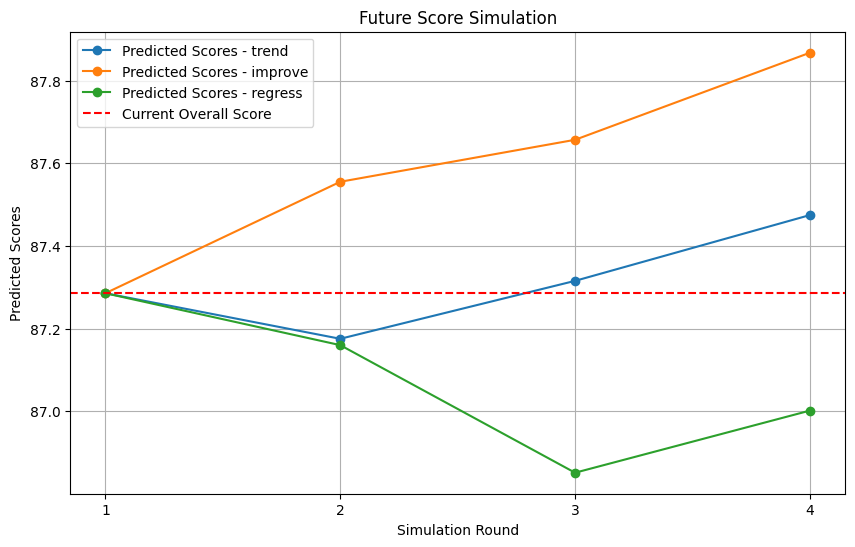

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create sample data
data = {
    'student_id': [1],  # Only one student
    'HW_scores': [[86, 87, 85]],  # Homework scores
    'Quiz_scores': [[87, 90]],     # Quiz scores
    'Exam_scores': [[94, 82]],      # Exam scores
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Calculate average scores for each category
hw_scores = df['HW_scores'].values[0]
quiz_scores = df['Quiz_scores'].values[0]
exam_scores = df['Exam_scores'].values[0]

# Calculate averages
hw_avg = np.mean(hw_scores) if len(hw_scores) > 0 else 0
quiz_avg = np.mean(quiz_scores) if len(quiz_scores) > 0 else 0
exam_avg = np.mean(exam_scores) if len(exam_scores) > 0 else 0

# Calculate the current overall score
def weighted_average(hw_avg, quiz_avg, exam_avg, hw_count, quiz_count, exam_count):
    total_count = hw_count + quiz_count + exam_count
    weights = {
        'HW': hw_count / total_count if total_count > 0 else 0,     # Weight for Homework
        'Quiz': quiz_count / total_count if total_count > 0 else 0, # Weight for Quiz
        'Exams': exam_count / total_count if total_count > 0 else 0 # Weight for Exams
    }
    return (hw_avg * weights['HW'] +
            quiz_avg * weights['Quiz'] +
            exam_avg * weights['Exams'])

current_final_score = weighted_average(hw_avg, quiz_avg, exam_avg, len(hw_scores), len(quiz_scores), len(exam_scores))

# Function to evaluate grade
def evaluate_grade(score):
    if score >= 97:
        return 'A+'
    elif score >= 93:
        return 'A'
    elif score >= 90:
        return 'A-'
    elif score >= 87:
        return 'B+'
    elif score >= 83:
        return 'B'
    elif score >= 80:
        return 'B-'
    elif score >= 77:
        return 'C+'
    elif score >= 73:
        return 'C'
    elif score >= 70:
        return 'C-'
    elif score >= 67:
        return 'D+'
    elif score >= 63:
        return 'D'
    elif score >= 60:
        return 'D-'
    else:
        return 'F'

# Simulate future scores based on the chosen mode
def simulate_future_scores(current_final_score, hw_scores, quiz_scores, exam_scores, hw_count, quiz_count, exam_count, mode):
    future_scores = [current_final_score]  # Start with the current score

    # Correctly retrieve the scores
    hw_scores = df['HW_scores'].iloc[0].copy()  # Use iloc to get the list and copy to avoid modifying original data
    quiz_scores = df['Quiz_scores'].iloc[0].copy()
    exam_scores = df['Exam_scores'].iloc[0].copy()

    # Now you can get the lengths
    current_hw_count = len(hw_scores)
    current_quiz_count = len(quiz_scores)
    current_exam_count = len(exam_scores)

    # Calculate current averages
    hw_avg = np.mean(hw_scores) if current_hw_count > 0 else 0
    quiz_avg = np.mean(quiz_scores) if current_quiz_count > 0 else 0
    exam_avg = np.mean(exam_scores) if current_exam_count > 0 else 0

    # Simulate future homework scores
    for _ in range(hw_count - current_hw_count):
        if mode == 'trend':
            predicted_hw_score = np.clip(np.random.normal(loc=hw_avg, scale=1), 0, 100)
        elif mode == 'improve':
            predicted_hw_score = np.clip(np.random.normal(loc=hw_avg + 1, scale=2), 0, 100)
        elif mode == 'regress':
            predicted_hw_score = np.clip(np.random.normal(loc=hw_avg - 1, scale=2), 0, 100)

        hw_scores = np.append(hw_scores, predicted_hw_score)
        current_hw_count += 1
        hw_avg = np.mean(hw_scores)

        future_scores.append(weighted_average(
            hw_avg,
            quiz_avg,
            exam_avg,
            current_hw_count,
            current_quiz_count,
            current_exam_count
        ))

    # Simulate future quiz scores
    for _ in range(quiz_count - current_quiz_count):
        if mode == 'trend':
            predicted_quiz_score = np.clip(np.random.normal(loc=quiz_avg, scale=1), 0, 100)
        elif mode == 'improve':
            predicted_quiz_score = np.clip(np.random.normal(loc=quiz_avg + 1, scale=2), 0, 100)
        elif mode == 'regress':
            predicted_quiz_score = np.clip(np.random.normal(loc=quiz_avg - 1, scale=2), 0, 100)

        quiz_scores = np.append(quiz_scores, predicted_quiz_score)
        current_quiz_count += 1
        quiz_avg = np.mean(quiz_scores)

        future_scores.append(weighted_average(
            hw_avg,
            quiz_avg,
            exam_avg,
            current_hw_count,
            current_quiz_count,
            current_exam_count
        ))

    # Simulate future exam scores
    for _ in range(exam_count - current_exam_count):
        if mode == 'trend':
            predicted_exam_score = np.clip(np.random.normal(loc=exam_avg, scale=1), 0, 100)
        elif mode == 'improve':
            predicted_exam_score = np.clip(np.random.normal(loc=exam_avg + 1, scale=2), 0, 100)
        elif mode == 'regress':
            predicted_exam_score = np.clip(np.random.normal(loc=exam_avg - 1, scale=2), 0, 100)

        exam_scores = np.append(exam_scores, predicted_exam_score)
        current_exam_count += 1
        exam_avg = np.mean(exam_scores)

        future_scores.append(weighted_average(
            hw_avg,
            quiz_avg,
            exam_avg,
            current_hw_count,
            current_quiz_count,
            current_exam_count
        ))

    return future_scores

# Define the total number of scores needed
total_hw = 5   # Target number of homework assignments
total_quiz = 3 # Target number of quizzes
total_exam = 2 # Target number of exams

# Get future scores for different modes
modes = ['trend', 'improve', 'regress']
future_scores_all_modes = {
    mode: simulate_future_scores(
        current_final_score,
        hw_scores,
        quiz_scores,
        exam_scores,
        total_hw,
        total_quiz,
        total_exam,
        mode
    ) for mode in modes
}

# Output results
for mode, scores in future_scores_all_modes.items():
    print(f"Mode: {mode}")
    for i, score in enumerate(scores):
        print(f"  Prediction {i + 1} Score: {score:.2f}, Grade: {evaluate_grade(score)}.")
    print()

# Plot the score trends
plt.figure(figsize=(10, 6))
for mode, scores in future_scores_all_modes.items():
    plt.plot(scores, label=f'Predicted Scores - {mode}', marker='o')
plt.axhline(y=current_final_score, color='r', linestyle='--', label='Current Overall Score')
plt.title('Future Score Simulation')
plt.xlabel('Simulation Round')
plt.ylabel('Predicted Scores')
max_length = max(len(scores) for scores in future_scores_all_modes.values())
plt.xticks(range(max_length), range(1, max_length + 1))  # Adjust x-axis ticks
plt.legend()
plt.grid()
plt.show()
